# Instacart Project 
## Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading CSV files

orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')

In [7]:
# test the file import 
# print('order_products_train =', order_products_train.shape)
print('order_products_prior =', order_products_prior.shape)
print('orders =', orders.shape)
print('products =', products.shape)
print('aisles =', aisles.shape)
print('departments =', departments.shape)

order_products_prior = (32434489, 4)
orders = (3421083, 7)
products = (49688, 4)
aisles = (134, 2)
departments = (21, 2)


In [8]:
# functions that can be used as needed

def maximum(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].max()

def minimum(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].min()
    
def mean(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].mean()
    
def std(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].std()
    
def q1(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].quantile(0.25)
    
def q3(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].quantile(0.75)
    
def median(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].median()
    
def iqr(filename, attribute_number):
    return q3(filename, attribute_number) - q1(filename, attribute_number)
    
def count(filename, attribute_number):
    d = pd.read_csv(filename)
    return d[d.columns[attribute_number-1]].count()
  
def correlation ( attribute1 , fileName1 , attribute2, fileName2 ):
    f1 = pd.read_csv(fileName1)
    f2 = pd.read_csv(fileName2)
    return f1[attribute1].corr(f2[attribute2])
    

In [9]:
list(orders.columns.values)

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [5]:
# joins to make tables with needed info

temp = order_products_prior.set_index('product_id').join(products.set_index('product_id'))
Orders_products = temp.set_index('department_id').join(departments.set_index('department_id'))
print(Orders_products)

               order_id  add_to_cart_order  reordered  \
department_id                                           
1                 13379                  1          0   
1                 21260                  6          1   
1                 43050                  2          1   
1                 47541                 21          0   
1                 53362                  7          0   
1                 63749                 12          0   
1                 82497                 23          0   
1                 84537                  5          1   
1                 90473                  4          0   
1                104917                  9          0   
1                116423                  7          1   
1                117908                 17          1   
1                121303                  7          1   
1                123343                 20          0   
1                126350                  5          0   
1                128626        

In [6]:
order_info = Orders_products.set_index('order_id').join(orders.set_index('order_id'))
print(order_info)

          add_to_cart_order  reordered  \
order_id                                 
2                         6          1   
2                         2          1   
2                         9          0   
2                         8          1   
2                         3          0   
2                         5          0   
2                         7          1   
2                         4          1   
2                         1          1   
3                         8          1   
3                         3          1   
3                         4          1   
3                         6          1   
3                         7          1   
3                         5          1   
3                         2          1   
3                         1          1   
4                         1          0   
4                        11          1   
4                        12          1   
4                        13          1   
4                         2       

In [97]:
a = order_info.groupby(['order_id']).size()

In [172]:
# Determine how many orders are placed on each day of the week

a0 = order_info.loc[order_info['order_dow'] == 0].groupby(['order_id']).size()
a1 = order_info.loc[order_info['order_dow'] == 1].groupby(['order_id']).size()
a2 = order_info.loc[order_info['order_dow'] == 2].groupby(['order_id']).size()
a3 = order_info.loc[order_info['order_dow'] == 3].groupby(['order_id']).size()
a4 = order_info.loc[order_info['order_dow'] == 4].groupby(['order_id']).size()
a5 = order_info.loc[order_info['order_dow'] == 5].groupby(['order_id']).size()
a6 = order_info.loc[order_info['order_dow'] == 6].groupby(['order_id']).size()

In [99]:
# Determine how many orders are placed on each hour of the day

arr = []
for x in range(0,24):
    arr.append(order_info.loc[order_info['order_hour_of_day'] == x].groupby(['order_id']).size())

In [109]:
count = 0
arr2 = []
for s in arr:
    arr2.append(str((s.size/a.size)*100) + " hour " + str(count))
    count+=1
arr2.sort()
for s in arr2:
    print(s)

0.15925974081721397 hour 3
0.1609705388142739 hour 4
0.2199153061675201 hour 2
0.2790778114476648 hour 5
0.360698428616487 hour 1
0.6647849962393549 hour 0
0.8955871987518018 hour 6
1.1699680920620839 hour 23
1.7898057591059557 hour 22
2.2842574856743996 hour 21
2.695471113331347 hour 7
3.051721467155478 hour 20
4.094095134055021 hour 19
5.235695084784038 hour 8
5.318964289113664 hour 18
6.65904791291976 hour 17
7.574044892583659 hour 9
7.961400664536153 hour 16
7.969394756995142 hour 12
8.123926474256844 hour 13
8.260230416495327 hour 14
8.278147137337264 hour 15
8.336438690909814 hour 11
8.457096607829731 hour 10


In [210]:
# What percent of orders are placed on each day of the week

b0=a0.size/a.size
b0

0.17349731280292788

In [211]:
b1=a1.size/a.size
b1

0.17316541799149826

In [212]:
b2=a2.size/a.size
b2

0.13747195068920276

In [213]:
b3=a3.size/a.size
b3

0.12827874436136533

In [214]:
b4=a4.size/a.size
b4

0.12479867018116418

In [215]:
b5=a5.size/a.size
b5

0.13250348225155947

In [216]:
b6=a6.size/a.size
b6

0.1302844217222821

In [202]:
# confirming percentages work out correctly

b0+b1+b2+b3+b4+b5+b6

1.0

In [187]:
# avg number of items purchased each day of the week

a0.median()

9.0

In [188]:
a1.median()

8.0

In [189]:
print(a2.mean())
print(a2.median())

9.543501035173264
8.0


In [190]:
print(a3.mean())
print(a3.median())

9.321331231813772
8.0


In [192]:
print(a4.mean())
print(a4.median())

9.439436008893054
8.0


In [191]:
print(a5.mean())
print(a5.median())

9.881950411050232
8.0


In [193]:
print(a6.mean())
print(a6.median())

10.744480097792039
9.0


In [111]:
# tables described by table name

number_products_department_day = order_info.groupby(['department', 'order_dow']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_department_day)

department     order_dow
alcohol        0              17437
               1              20600
               2              20325
               3              22459
               4              26142
               5              27429
               6              19304
babies         0              81622
               1              73057
               2              56698
               3              52455
               4              51568
               5              51573
               6              56829
bakery         0             225382
               1             204386
               2             152710
               3             139410
               4             137722
               5             153850
               6             163327
beverages      0             433110
               1             482695
               2             371531
               3             344815
               4             340146
               5             376179
   

In [16]:
number_products_department = order_info.groupby(['department']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_department)

department
alcohol             153696
babies              423802
bakery             1176787
beverages          2690129
breakfast           709569
bulk                 34573
canned goods       1068058
dairy eggs         5414016
deli               1051249
dry goods pasta     866627
frozen             2236432
household           738666
international       269253
meat seafood        708931
missing              69145
other                36291
pantry             1875577
personal care       447123
pets                 97724
produce            9479291
snacks             2887550
dtype: int64


In [80]:
percent_department = ((number_products_department/order_info['department'].size)*100).sort_values()
percent_department

department
bulk                0.106593
other               0.111890
missing             0.213184
pets                0.301297
alcohol             0.473866
international       0.830144
babies              1.306640
personal care       1.378542
meat seafood        2.185732
breakfast           2.187699
household           2.277409
dry goods pasta     2.671930
deli                3.241146
canned goods        3.292970
bakery              3.628197
pantry              5.782662
frozen              6.895228
beverages           8.294038
snacks              8.902715
dairy eggs         16.692158
produce            29.225961
dtype: float64

In [217]:
# what is "missing" department?

order_info.loc[order_info['department'] == 'missing']

,add_to_cart_order,reordered,product_name,aisle_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,,
75,13,0,Tomato Basil Bisque Soup,100,missing,106387,prior,1,5,19,NaN
154,4,0,Paleo Blueberry Muffin,100,missing,73310,prior,68,6,19,0.0
154,3,1,Cold Pressed Watermelon & Lemon Juice Blend,100,missing,73310,prior,68,6,19,0.0
420,4,0,Organic Poblano Pepper,100,missing,161762,prior,37,2,11,2.0
501,11,0,Organic Plain Unsweetened Nondairy Cashew Yogurt,100,missing,86142,prior,40,2,12,16.0
549,20,0,Liquid Kimchi Tangy Vegan Fermented & Probioti...,100,missing,120786,prior,4,2,21,8.0
613,3,0,Cilantro Bunch,100,missing,53840,prior,8,6,11,6.0
882,7,1,Noodle Chicken,100,missing,160538,prior,13,5,20,8.0
889,9,0,Organic Pineapple Cottage Cheese,100,missing,1264,prior,25,1,7,4.0


In [130]:
percent_department_day = number_products_department_day/number_products_department
percent_department_day.to_csv('foo.csv')

In [128]:
percent_department_day.loc[percent_department_day.index == 1]

Series([], dtype: float64)

In [15]:
percent_department_day.sort_values()

department       order_dow
canned goods     4            0.107815
meat seafood     4            0.108483
international    4            0.109926
meat seafood     3            0.109954
dry goods pasta  4            0.110600
produce          4            0.111027
canned goods     3            0.111755
produce          3            0.112800
alcohol          0            0.113451
deli             4            0.113835
dry goods pasta  3            0.113960
bulk             4            0.115379
deli             3            0.116179
frozen           4            0.116296
bakery           4            0.117032
international    3            0.117139
dairy eggs       4            0.117470
missing          4            0.118215
bakery           3            0.118467
dairy eggs       3            0.118485
frozen           3            0.119045
dry goods pasta  5            0.119641
pantry           4            0.120031
missing          3            0.120211
breakfast        4            0.12041

In [16]:
number_products_day_department = order_info.groupby(['order_dow', 'department']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_day_department)

order_dow  department     
0          alcohol              17437
           babies               81622
           bakery              225382
           beverages           433110
           breakfast           127162
           bulk                  6137
           canned goods        228161
           dairy eggs         1020167
           deli                209526
           dry goods pasta     182149
           frozen              439144
           household           126237
           international        55728
           meat seafood        151417
           missing              13220
           other                 6086
           pantry              351950
           personal care        80387
           pets                 17151
           produce            1953784
           snacks              483709
1          alcohol              20600
           babies               73057
           bakery              204386
           beverages           482695
           breakfast   

In [107]:
number_products_day = order_info.groupby(['order_dow']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_day)

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
dtype: int64


In [90]:
number_products_hour = order_info.groupby(['order_hour_of_day']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_hour)

order_hour_of_day
0      218948
1      115786
2       69434
3       51321
4       53283
5       88062
6      290795
7      891937
8     1719973
9     2456713
10    2764426
11    2738582
12    2620847
13    2663292
14    2691548
15    2664533
16    2537458
17    2089465
18    1637923
19    1259401
20     977038
21     796370
22     634734
23     402620
dtype: int64


In [209]:
# percent products ordered by dow

(number_products_day/order_info['order_dow'].size)*100

order_dow
0    19.145256
1    17.468615
2    13.004053
3    11.851943
4    11.676506
5    12.978570
6    13.875058
dtype: float64

In [92]:
# percent products ordered by hour of the day

((number_products_hour/order_info['order_hour_of_day'].size)*100).sort_values()

order_hour_of_day
3     0.158230
4     0.164279
2     0.214075
5     0.271507
1     0.356984
0     0.675047
6     0.896561
23    1.241333
22    1.956972
21    2.455318
7     2.749965
20    3.012343
19    3.882907
18    5.049942
8     5.302914
17    6.442109
9     7.574385
16    7.823333
12    8.080433
13    8.211296
15    8.215122
14    8.298413
11    8.443426
10    8.523106
dtype: float64

In [19]:
percent_day_department = number_products_day_department/number_products_day
percent_day_department

order_dow  department     
0          alcohol            0.002808
           babies             0.013144
           bakery             0.036295
           beverages          0.069748
           breakfast          0.020478
           bulk               0.000988
           canned goods       0.036743
           dairy eggs         0.164287
           deli               0.033742
           dry goods pasta    0.029333
           frozen             0.070719
           household          0.020329
           international      0.008974
           meat seafood       0.024384
           missing            0.002129
           other              0.000980
           pantry             0.056678
           personal care      0.012945
           pets               0.002762
           produce            0.314636
           snacks             0.077896
1          alcohol            0.003636
           babies             0.012894
           bakery             0.036073
           beverages          0.08519

In [20]:
percent_day_department.sort_values()

order_dow  department
0          other         0.000980
           bulk          0.000988
6          bulk          0.001049
4          bulk          0.001053
1          other         0.001055
2          bulk          0.001081
5          bulk          0.001088
3          bulk          0.001105
1          bulk          0.001119
6          other         0.001120
2          other         0.001178
3          other         0.001197
5          other         0.001200
4          other         0.001205
1          missing       0.002008
2          missing       0.002033
0          missing       0.002129
4          missing       0.002158
3          missing       0.002162
5          missing       0.002237
6          missing       0.002238
1          pets          0.002564
0          pets          0.002762
           alcohol       0.002808
2          pets          0.002827
5          pets          0.003255
3          pets          0.003275
4          pets          0.003279
6          pets          0

In [103]:
hour_day = order_info.groupby(['order_dow', 'order_hour_of_day']).size()


In [108]:
# Percent by dow and hour of day

(hour_day/number_products_day)*100

order_dow  order_hour_of_day
0          0                    0.626056
           1                    0.362709
           2                    0.204922
           3                    0.142536
           4                    0.134822
           5                    0.187305
           6                    0.563428
           7                    2.148167
           8                    4.935837
           9                    7.106517
           10                   8.311896
           11                   8.627404
           12                   8.620158
           13                   8.992658
           14                   9.097043
           15                   8.890430
           16                   8.077858
           17                   6.372420
           18                   4.581905
           19                   3.500156
           20                   2.960385
           21                   2.466187
           22                   1.945821
           23               

In [26]:
((hour_day/number_products_day)*100).sort_values()

order_dow  order_hour_of_day
1          3                    0.125559
0          4                    0.134822
1          4                    0.135425
0          3                    0.142536
3          3                    0.150282
2          4                    0.161269
           3                    0.166580
4          3                    0.167141
6          3                    0.175499
           4                    0.176321
3          4                    0.177934
4          4                    0.182799
0          5                    0.187305
1          2                    0.190916
2          2                    0.197710
5          3                    0.197765
0          2                    0.204922
5          4                    0.207576
4          2                    0.210683
3          2                    0.225435
5          2                    0.226106
6          5                    0.239562
           2                    0.253094
1          5                

In [27]:
number_products = order_products_prior.groupby(['order_id']).size()
number_products.columns = ['order_id', 'number_of_products']
print(number_products)

order_id
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
32          9
           ..
3421048     8
3421050    13
3421051    31
3421052     2
3421053     9
3421055    19
3421057     5
3421059     6
3421060    17
3421061    22
3421062     7
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Length: 3214874, dtype: int64


Text(0.5,1,'Histogram: Number of Items per Order')

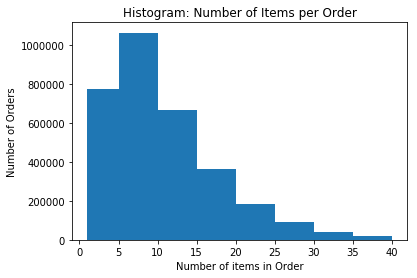

In [130]:
#graphing: Graphs explained by title

plt.hist(number_products, bins=[1,5,10,15,20,25,30,35,40])
plt.xlabel('Number of items in Order')
plt.ylabel('Number of Orders')
plt.title('Histogram: Number of Items per Order')

([<matplotlib.axis.XTick at 0x3bbde3a58>,
 <a list of 10 Text xticklabel objects>)

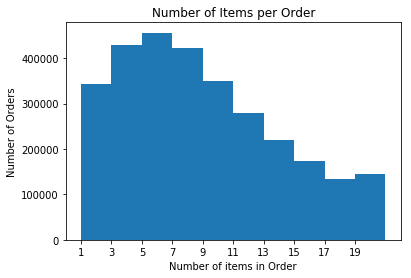

In [138]:
plt.hist(number_products, bins=np.arange(1, 22, step=2))
plt.xlabel('Number of items in Order')
plt.ylabel('Number of Orders')
plt.title('Number of Items per Order')
plt.xticks(np.arange(1, 21, step=2))

Text(0.5,1,'Histogram: Number of Items per Order')

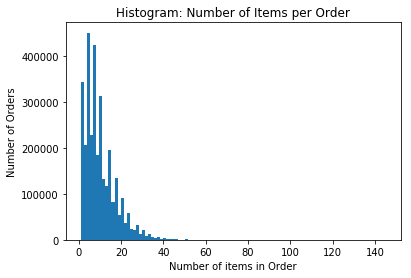

In [108]:
plt.hist(number_products, bins=100)
plt.xlabel('Number of items in Order')
plt.ylabel('Number of Orders')
plt.title('Histogram: Number of Items per Order')

In [94]:
items_per_order = order_products_prior.groupby(['order_id']).size().to_frame('items_in_order')


In [112]:
# percent of orders with less than or equal to 10 items 
# and greateer than or equlual to 5

a = items_per_order.loc[items_per_order['items_in_order'] <= 10]
b = a.loc[a['items_in_order'] >= 5]
b.size/number_products.size

0.3823733060766923

In [117]:
# percent of orders with less than or equal to 20 items

a = items_per_order.loc[items_per_order['items_in_order'] <= 20]
a.size/number_products.size

0.9056230508567366

In [62]:
#order_products_prior.groupby(['order_id']).transform(np.size)
alcohol_orders = order_info.loc[order_info['department'] == 'alcohol']

In [64]:
alcohol_orders

,add_to_cart_order,reordered,product_name,aisle_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,,
13,1,0,Light,27,alcohol,45082,prior,2,6,17,1.0
13,3,0,"Handmade Vodka From Austin, Texas",124,alcohol,45082,prior,2,6,17,1.0
191,1,1,Noir Orange Liqueur & Cognac,124,alcohol,176417,prior,44,3,2,6.0
191,2,1,Zinfandel,28,alcohol,176417,prior,44,3,2,6.0
194,1,0,Meritage Wine,28,alcohol,48052,prior,30,0,13,1.0
194,6,0,Bourbon Whiskey,124,alcohol,48052,prior,30,0,13,1.0
282,2,1,Silver Tequila,124,alcohol,8456,prior,11,0,12,14.0
282,3,0,Imported Light Beer,27,alcohol,8456,prior,11,0,12,14.0
282,4,0,Premium Belgian Lager,27,alcohol,8456,prior,11,0,12,14.0


In [67]:
# saturday alcohol orders

alcohol_orders_sat = alcohol_orders.loc[alcohol_orders['order_dow'] == 5]

In [69]:
# lest and most ordered alcohol on saturday

alcohol_orders_sat.groupby(['product_name']).size().sort_values()

product_name
007 Vodka With Martini Glasses                       1
Real Sangria                                         1
Raspberry Burst Malt Beverage                        1
Pumpkin Sour                                         1
Premium Spiced Rum                                   1
Premium Lager                                        1
Port                                                 1
Cabernet Sauvignon California 2008                   1
Pinot Noir, California 2010                          1
Pinot Griis Oregon 2012                              1
Pinot Grigio, California, 2013, 4 Pack, Bottle       1
Original Caribbean Rum With Coconut Flavour          1
California Champagne                                 1
Original Alcoholic Ginger Beer                       1
Organic Pale Ale                                     1
Organic Cider                                        1
California Petite Sirah                              1
Non-Alcoholic Malt Beverage                         

In [70]:
#above repeted for monday to compare

alcohol_orders_mon = alcohol_orders.loc[alcohol_orders['order_dow'] == 0]

In [71]:
alcohol_orders_mon.groupby(['product_name']).size().sort_values()

product_name
'Swingtop' Premium Lager                           1
Premium Light Lager Beer                           1
California Paisano                                 1
Port                                               1
Campfire Stout                                     1
Pinot Noir, Central Coast, 2006                    1
Pinot Noir Monterey                                1
Pinot Noir Marlborough                             1
Pinot Griis Oregon 2012                            1
Censored Rich Copper Ale                           1
Central Coast Merlot                               1
Chalk Hill Chardonnay                              1
Premium Spiced Rum                                 1
Pilsner                                            1
Phantom Red                                        1
Park Hoppy Wheat Beer                              1
Champagne, Sparkling, California, Brut Cuvee       1
Pale 31 California Pale Ale                        1
Otis Oatmeal Stout Beer          

In [74]:
# above repaeated for snacks

snack_orders = order_info.loc[order_info['department'] == 'snacks']

In [76]:
snack_orders_sat = snack_orders.loc[snack_orders['order_dow'] == 5]

In [77]:
snack_orders_sat.groupby(['product_name']).size().sort_values()

product_name
Potato Chips Red Hot Flavored Family Size                               1
Roasted Jumbo Virginia Peanuts                                          1
Organic Toasted Coconut Popcorn                                         1
Sweet Potatoes Tortilla Chips                                           1
Organic Dark Chocolate                                                  1
Garlic Herb Pumpkin Seeds                                               1
Chocolate Caramel Cashew Trail Mix                                      1
Chocolate Caramel Whey Protein Bar                                      1
Even Thinner Limited Edition Crackers                                   1
Sweets + Sours                                                          1
Milk Chocolate Candies Fun Size Packs                                   1
Cheese Ups, Classic Cheese                                              1
Mild Smoked Snack Sticks                                                1
Roasted Chickpeas        

In [80]:
#snack_orders_sat = snack_orders.loc[snack_orders['order_dow'] == 5]
snack_orders_mon = snack_orders.loc[snack_orders['order_dow'] == 1]

In [81]:
#snack_orders_sat.groupby(['product_name']).size().sort_values()
snack_orders_mon.groupby(['product_name']).size().sort_values()

product_name
Swiss Dark Chocolate with Honey & Almond Nougat Candy                                                   1
Honey Snack Grahams                                                                                     1
Pecan Nut Cakes                                                                                         1
Pecan Crowns Chocolates By Whitman Candies                                                              1
Cheese Buns                                                                                             1
Honey Roasted Mixed Nuts                                                                                1
Cheetos Flamin' Hot & Doritos Dinamita Chile Limon Cheese Flavored Snacks & Rolled Tortilla Chips       1
Honey Maid Cinnamon Graham Crackers                                                                     1
Cherries Apple & Maple Snack Mix                                                                        1
Spry Fresh Fruit Chewing Gum     

In [83]:
# repeated for frozen items

frozen_orders = order_info.loc[order_info['department'] == 'frozen']

In [84]:
frozen_orders_sat = frozen_orders.loc[frozen_orders['order_dow'] == 5]

In [85]:
frozen_orders_sat.groupby(['product_name']).size().sort_values()

product_name
Mushroom Rice Burger Patties                                  1
Pomegranate Dark Chocolate Ice Cream Bars                     1
Biscuits Maple Sausage                                        1
Gluten Free Mongolian Beef With Asparagus And Scallions       1
Lemon Pepper Fish                                             1
Birthday Blast Frozen Dairy Dessert                           1
Cinnamon Ice Cream                                            1
Spicy Chipotle Beef & Bean Burrito                            1
Spicy Italian Sausage Rising Crust Pizza                      1
Pizza, Super                                                  1
Classic Cheddar Pierogies                                     1
Pizza Rice Crust Pesto                                        1
Spinach Pancakes                                              1
Pizza Pepperoni 3 Cheeses                                     1
Spinaci Pizza                                                 1
Steak Burrito Bowl         

In [86]:
frozen_orders_mon = frozen_orders.loc[frozen_orders['order_dow'] == 1]

In [87]:
frozen_orders_mon.groupby(['product_name']).size().sort_values()

product_name
Buffalo Style Chicken                                                                      1
Old Fashioned Vanilla Frozen Custard                                                       1
Onion 6 Ct Bagels                                                                          1
Orange Flavored Ice Cubes                                                                  1
Orange Peach Mango Juice                                                                   1
Organic Bowls Hot Cereal Steel-Cut Oats                                                    1
Brown Rice Risotto with Carrots Peas Onion & Kale in Parmesan Asiago Sauce Steamers        1
Organic Four Cheese Pizza                                                                  1
Brown N Serve Hot & Spicy Sausage Links                                                    1
Organic Non Dairy Vanilla Frozen Dessert                                                   1
Organic Pure Pistachio Gelato                            

In [88]:
# repeated for beverages

beverages_orders = order_info.loc[order_info['department'] == 'beverages']

In [89]:
beverages_orders_sat = beverages_orders.loc[beverages_orders['order_dow'] == 5]

In [90]:
beverages_orders_sat.groupby(['product_name']).size().sort_values()

product_name
Peppermint Caffeine Free Herbal Tea - 40 CT               1
Peppermint Chocolate Caffeine Free Tea                    1
Herbal Tea Wild Berries                                   1
Ph 9+Purified Water With Electrolytes                     1
Herbal Tea Chamomile Nights Bedtime Blend Tea Bags        1
Pineapple Flavored Coconut Water                          1
Pineapple Mango Coconut Water                             1
Herbal Supplement Milk Thistle Tea Bags - 24 CT           1
Pink Lemonade Unsweetened Soft Drink Mix                  1
Pinot Noir Sparkling Soda                                 1
Chamomile Lemon Tea Bags                                  1
Plum Smart 100% Juice Blend                               1
Pomegranate Cranberry & Aloe Vera Enrich Drink            1
Chambord French Press, 8 Cup                              1
Chai Ultra Spice Tea                                      1
Chai Tea Latte The Original Cups                          1
Pomegranate Sangria Seltzer

In [91]:
beverages_orders_mon = beverages_orders.loc[beverages_orders['order_dow'] == 5]

In [92]:
beverages_orders_mon.groupby(['product_name']).size().sort_values()

product_name
Peppermint Caffeine Free Herbal Tea - 40 CT               1
Peppermint Chocolate Caffeine Free Tea                    1
Herbal Tea Wild Berries                                   1
Ph 9+Purified Water With Electrolytes                     1
Herbal Tea Chamomile Nights Bedtime Blend Tea Bags        1
Pineapple Flavored Coconut Water                          1
Pineapple Mango Coconut Water                             1
Herbal Supplement Milk Thistle Tea Bags - 24 CT           1
Pink Lemonade Unsweetened Soft Drink Mix                  1
Pinot Noir Sparkling Soda                                 1
Chamomile Lemon Tea Bags                                  1
Plum Smart 100% Juice Blend                               1
Pomegranate Cranberry & Aloe Vera Enrich Drink            1
Chambord French Press, 8 Cup                              1
Chai Ultra Spice Tea                                      1
Chai Tea Latte The Original Cups                          1
Pomegranate Sangria Seltzer

In [10]:
temp = order_products_prior.loc[order_products_prior['reordered'] == 1].set_index('product_id').join(products.set_index('product_id'))
reordered = temp.set_index('department_id').join(departments.set_index('department_id'))
#print(reorded)
#reorded = Orders_products.head(1000).loc[order_info['reordered'] == 1]


In [11]:
number_products_department_reorder = reordered.groupby(['department']).size()
number_products_department_reorder.columns = ['department', 'number_of_products']
print(number_products_department_reorder)

department
alcohol              87595
babies              245369
bakery              739188
beverages          1757892
breakfast           398013
bulk                 19950
canned goods        488535
dairy eggs         3627221
deli                638864
dry goods pasta     399581
frozen             1211890
household           297075
international        99416
meat seafood        402442
missing              27371
other                14806
pantry              650301
personal care       143584
pets                 58760
produce            6160710
snacks             1657973
dtype: int64


In [12]:
percent_department_reorder = (number_products_department_reorder/number_products_department)*100

In [13]:
percent_department_reorder

department
alcohol            56.992375
babies             57.897084
bakery             62.814086
beverages          65.346011
breakfast          56.092219
bulk               57.703989
canned goods       45.740493
dairy eggs         66.996865
deli               60.771901
dry goods pasta    46.107610
frozen             54.188547
household          40.217771
international      36.922894
meat seafood       56.767443
missing            39.584930
other              40.797994
pantry             34.672050
personal care      32.112864
pets               60.128525
produce            64.991253
snacks             57.417984
dtype: float64

In [57]:
percent_department_reorder = percent_department_reorder.sort_values()

In [18]:
percent_department_reorder

department
dairy eggs         66.996865
beverages          65.346011
produce            64.991253
bakery             62.814086
deli               60.771901
pets               60.128525
babies             57.897084
bulk               57.703989
snacks             57.417984
alcohol            56.992375
meat seafood       56.767443
breakfast          56.092219
frozen             54.188547
dry goods pasta    46.107610
canned goods       45.740493
other              40.797994
household          40.217771
missing            39.584930
international      36.922894
pantry             34.672050
personal care      32.112864
dtype: float64

Text(0.5, 0, 'Department')

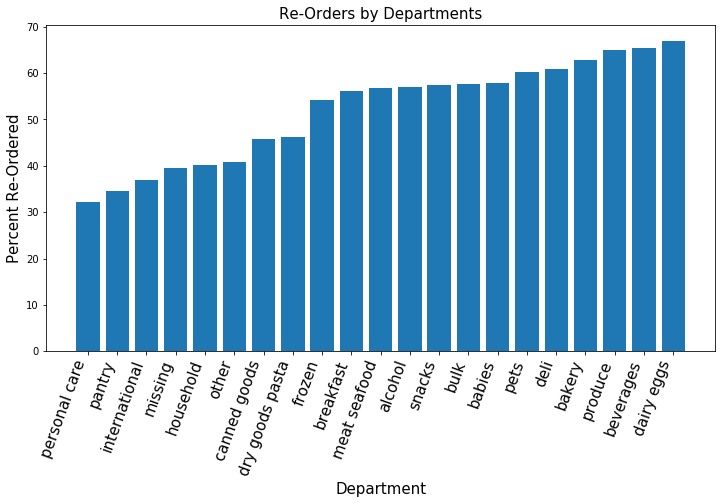

In [78]:
#   This is the code for the departments and aisles
departmentIDs = departments['department'].tolist()
departmentReorderCount = percent_department_reorder#.tolist()
#aisleIDs = dfAisles['aisle_id'].tolist()
#aisleReorderCount = [0] * dfAisles['aisle_id'].count()
#dfSmallerPrior = dfOrderProductsPrior.head(100000)
#dfSmallerPrior = dfOrderProductsPrior.head(1000)
#for index, row in dfSmallerPrior.iterrows():
    #if row['reordered'] == 1:
        #productNumber = dfProducts.loc[dfProducts['product_id'] == row['product_id']]
        #departmentReorderCount[productNumber['department_id'].item()-1] += 1
        #aisleReorderCount[productNumber['aisle_id'].item()-1] += 1

#   This is the matplotlib code, the ax[0].bar(x axis data, y axis data) is the top graph, and ax[1] is the bottom one
#fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
plt.figure(figsize=(12,6))
plt.xticks(fontsize=15, rotation=70, horizontalalignment='right')
plt.bar(percent_department_reorder.index, percent_department_reorder)
plt.title("Re-Orders by Departments",fontsize=15)
plt.ylabel("Percent Re-Ordered",fontsize=15)
plt.xlabel("Department",fontsize=15)
#plt.xticks(rotation=90)
#ax[1].bar(aisleIDs,aisleReorderCount)
#ax[1].set_title("Re-Orders by Aisles")
#ax[1].set_ylabel("Times Re-Ordered")
#ax[1].set_xlabel("Aisle_id")

Text(0.5, 0, 'Department')

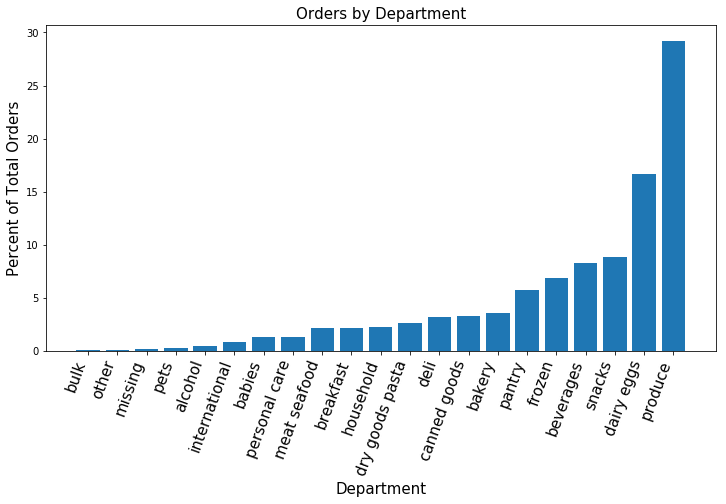

In [84]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=15, rotation=70, horizontalalignment='right')
plt.bar(percent_department.index, percent_department)
plt.title("Orders by Department",fontsize=15)
plt.ylabel("Percent of Total Orders",fontsize=15)
plt.xlabel("Department",fontsize=15)

In [36]:
temp2 = order_products_prior.loc[order_products_prior['reordered'] == 1].set_index('product_id').join(products.set_index('product_id'))
reordered2 = temp.set_index('aisle_id').join(aisles.set_index('aisle_id'))
#print(reorded)
#reorded = Orders_products.head(1000).loc[order_info['reordered'] == 1]

In [37]:
number_products_aisle_reorder = reordered2.groupby(['aisle']).size()
number_products_aisle_reorder.columns = ['aisle', 'number_of_products']
print(number_products_aisle_reorder)

aisle
air fresheners candles             6135
asian foods                       58501
baby accessories                   4496
baby bath body care                2538
baby food formula                225748
bakery desserts                   17405
baking ingredients                99668
baking supplies decor              3962
beauty                             1308
beers coolers                     27506
body lotions soap                 13428
bread                            391937
breakfast bakery                 163307
breakfast bars pastries           42103
bulk dried fruits vegetables      10775
bulk grains rice dried goods       9175
buns rolls                        59993
butter                           146496
candy chocolate                  172313
canned fruit applesauce           49093
canned jarred vegetables         125096
canned meals beans               136348
canned meat seafood               32014
cat food care                     39377
cereal                           2

In [39]:
temp = order_products_prior.set_index('product_id').join(products.set_index('product_id'))
orders_aisle = temp.set_index('aisle_id').join(aisles.set_index('aisle_id'))
print(orders_aisle)

               order_id  add_to_cart_order  reordered  \
department_id                                           
1                 13379                  1          0   
1                 21260                  6          1   
1                 43050                  2          1   
1                 47541                 21          0   
1                 53362                  7          0   
1                 63749                 12          0   
1                 82497                 23          0   
1                 84537                  5          1   
1                 90473                  4          0   
1                104917                  9          0   
1                116423                  7          1   
1                117908                 17          1   
1                121303                  7          1   
1                123343                 20          0   
1                126350                  5          0   
1                128626        

In [40]:
number_products_aisle = orders_aisle.groupby(['aisle']).size()
#number_products_department_day.columns = ['department', 'reordered', 'number_of_products']
print(number_products_aisle)

aisle
air fresheners candles             19851
asian foods                       166607
baby accessories                    8160
baby bath body care                 8581
baby food formula                 382456
bakery desserts                    34871
baking ingredients                326692
baking supplies decor              23692
beauty                              6168
beers coolers                      48657
body lotions soap                  40768
bread                             584834
breakfast bakery                  250770
breakfast bars pastries            71860
bulk dried fruits vegetables       17368
bulk grains rice dried goods       17205
buns rolls                        113015
butter                            254317
candy chocolate                   300567
canned fruit applesauce            87197
canned jarred vegetables          297037
canned meals beans                270314
canned meat seafood                67046
cat food care                      63421
cereal    

In [85]:
percent_aisle = ((number_products_aisle/orders_aisle['aisle'].size)*100).sort_values()
percent_aisle

aisle
frozen juice                      0.014962
beauty                            0.019017
baby accessories                  0.025158
baby bath body care               0.026456
eye ear care                      0.027668
kitchen supplies                  0.028279
skin care                         0.031337
shave needs                       0.031892
first aid                         0.033520
specialty wines champagnes        0.034525
ice cream toppings                0.034537
kosher foods                      0.036375
facial care                       0.037519
deodorants                        0.045677
indian foods                      0.049025
bulk grains rice dried goods      0.053045
bulk dried fruits vegetables      0.053548
more household                    0.053998
muscles joints pain relief        0.057602
frozen dessert                    0.059563
feminine care                     0.060901
air fresheners candles            0.061203
packaged seafood                  0.064533
cocoa

In [41]:
percent_aisle_reorder = (number_products_aisle_reorder/number_products_aisle)*100

In [59]:
percent_aisle_reorder = percent_aisle_reorder.sort_values()

In [44]:
percent_aisle_reorder

aisle
milk                             78.142792
water seltzer sparkling water    72.959349
fresh fruits                     71.810379
eggs                             70.536611
soy lactosefree                  69.255139
packaged produce                 69.073427
yogurt                           68.648935
cream                            68.504601
bread                            67.016795
refrigerated                     66.330197
breakfast bakery                 65.122224
energy sports drinks             64.960672
soft drinks                      63.883179
packaged vegetables fruits       63.851396
white wines                      63.008050
frozen breakfast                 62.622066
cat food care                    62.088267
bulk dried fruits vegetables     62.039383
trail mix snack mix              62.023040
prepared meals                   61.975927
coffee                           61.972715
poultry counter                  61.286039
fresh dips tapenades             60.793118
tofu 

Text(0.5, 0, 'Aisle')

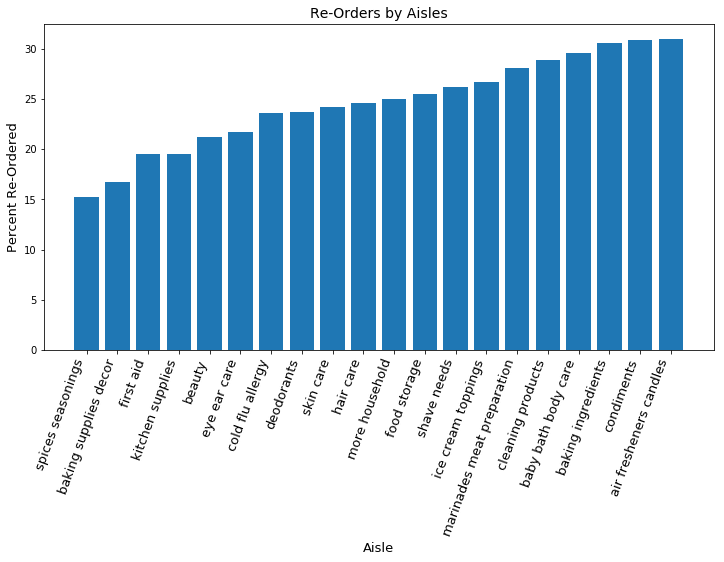

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=13, rotation=70, horizontalalignment='right')
plt.bar(percent_aisle_reorder.head(20).index, percent_aisle_reorder.head(20))
plt.title("Re-Orders by Aisles",fontsize=14)
plt.ylabel("Percent Re-Ordered",fontsize=13)
plt.xlabel("Aisle",fontsize=13)

Text(0.5, 0, 'Aisle')

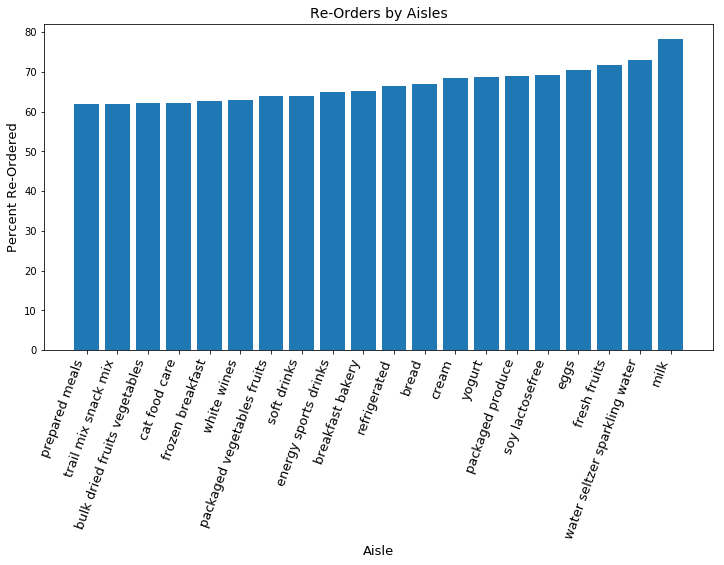

In [61]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=13, rotation=70, horizontalalignment='right')
plt.bar(percent_aisle_reorder.tail(20).index, percent_aisle_reorder.tail(20))
plt.title("Re-Orders by Aisles",fontsize=14)
plt.ylabel("Percent Re-Ordered",fontsize=13)
plt.xlabel("Aisle",fontsize=13)

Text(0.5, 0, 'Aisle')

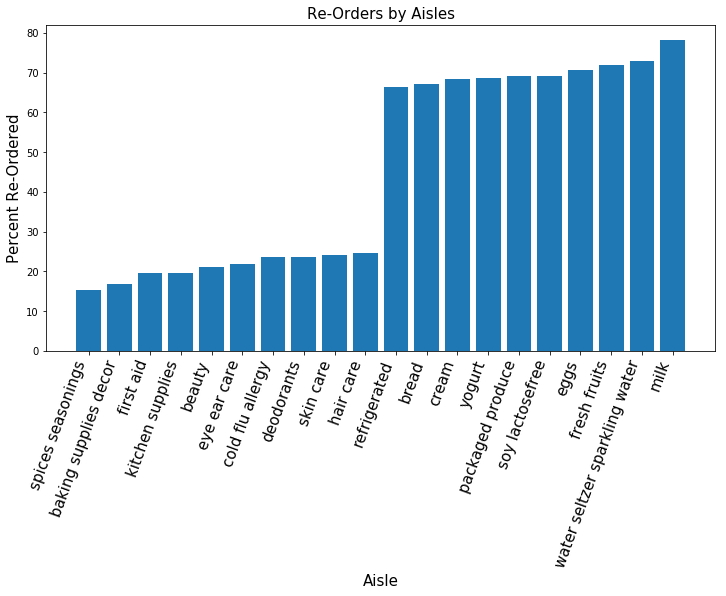

In [79]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=15, rotation=70, horizontalalignment='right')
plt.bar(x, y)
plt.title("Re-Orders by Aisles",fontsize=15)
plt.ylabel("Percent Re-Ordered",fontsize=15)
plt.xlabel("Aisle",fontsize=15)

In [46]:
# number of aisles then departments

aisles.count()

aisle_id    134
aisle       134
dtype: int64

In [47]:
departments.count()

department_id    21
department       21
dtype: int64

In [73]:
x=percent_aisle_reorder.head(10).index.tolist()+percent_aisle_reorder.tail(10).index.tolist()

In [68]:
y=percent_aisle_reorder.head(10).tolist()+percent_aisle_reorder.tail(10).tolist()

In [86]:
x2=percent_aisle.head(10).index.tolist()+percent_aisle.tail(10).index.tolist()

In [87]:
y2=percent_aisle.head(10).tolist()+percent_aisle.tail(10).tolist()

Text(0.5, 0, 'Aisle')

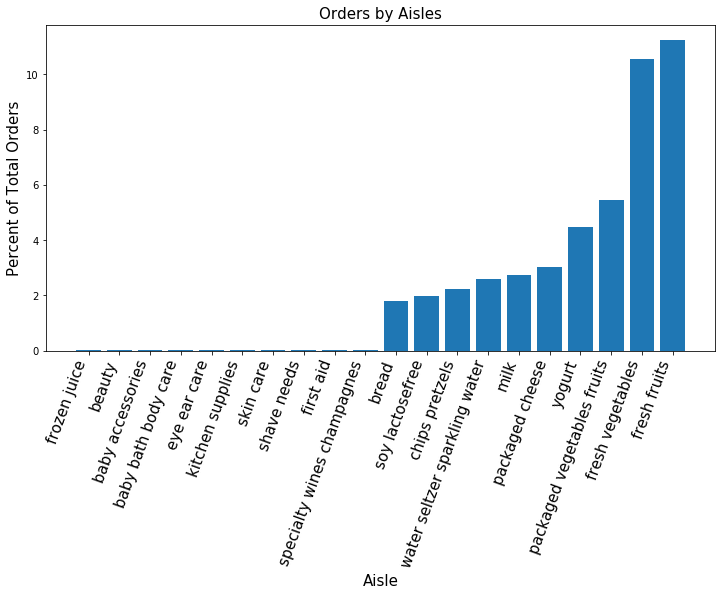

In [89]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=15, rotation=70, horizontalalignment='right')
plt.bar(x2, y2)
plt.title("Orders by Aisles",fontsize=15)
plt.ylabel("Percent of Total Orders",fontsize=15)
plt.xlabel("Aisle",fontsize=15)

In [7]:
# total order_info size

t_size = order_info.size

In [8]:
# first items placed in order

first_items = order_info.loc[order_info['add_to_cart_order'] == 1]
first_items

,add_to_cart_order,reordered,product_name,aisle_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,,
2,1,1,Organic Egg Whites,86,dairy eggs,202279,prior,3,5,9,8.0
3,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,dairy eggs,205970,prior,16,5,17,12.0
4,1,0,Plain Pre-Sliced Bagels,93,bakery,178520,prior,36,1,9,7.0
5,1,1,Bag of Organic Bananas,24,produce,156122,prior,42,6,16,9.0
6,1,0,Cleanse,31,beverages,22352,prior,4,1,12,30.0
7,1,0,Orange Juice,31,beverages,142903,prior,11,2,14,30.0
8,1,1,Original Hawaiian Sweet Rolls,43,bakery,3107,prior,5,4,6,17.0
9,1,0,"Organic Red Radish, Bunch",83,produce,139016,prior,14,0,19,5.0
10,1,1,Banana,24,produce,135442,prior,4,6,8,8.0


In [9]:
# this geeneral codee is utilized many time to check percent 
# reordered for various tables

temp = first_items.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    32.246707
1    67.753293
dtype: float64

In [10]:
first_dairy_eggs = first_items.loc[first_items['department'] == 'dairy eggs']

In [11]:
temp = first_dairy_eggs.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    23.836537
1    76.163463
dtype: float64

In [12]:
(first_dairy_eggs.size/t_size)*100

2.0066201752091732

In [13]:
temp = order_info.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    41.030253
1    58.969747
dtype: float64

In [14]:
later_items = order_info.loc[order_info['add_to_cart_order'] > 42]
later_items

,add_to_cart_order,reordered,product_name,aisle_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,,
454,43,0,Non Dairy Coffee Caramel Fudge,37,frozen,11335,prior,23,1,17,14.0
454,44,0,Milk Free Better Than Sour Cream,108,dairy eggs,11335,prior,23,1,17,14.0
742,43,0,All Natural Mild Hummus,51,pantry,150739,prior,4,0,17,10.0
742,45,1,2-Ply Right Size 100% Recycled Paper Towels,54,household,150739,prior,4,0,17,10.0
742,44,0,Roasted Red Pepper Hummus,67,deli,150739,prior,4,0,17,10.0
775,43,0,Whole Wheat Pre-Sliced Mini Bagels,93,bakery,149156,prior,3,5,8,16.0
775,45,0,Banana,24,produce,149156,prior,3,5,8,16.0
775,44,0,Whole Vitamin D Milk,84,dairy eggs,149156,prior,3,5,8,16.0
775,46,0,White Cheddar Popcorn,23,snacks,149156,prior,3,5,8,16.0


In [113]:
temp = later_items.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    59.307033
1    40.692967
dtype: float64

In [115]:
mid_items = order_info.loc[order_info['add_to_cart_order'] > 11]
mid_items

,add_to_cart_order,reordered,product_name,aisle_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,,
4,12,1,Sugarfree Energy Drink,64,beverages,178520,prior,36,1,9,7.0
4,13,1,Energy Drink,64,beverages,178520,prior,36,1,9,7.0
5,12,1,Clementines,32,produce,156122,prior,42,6,16,9.0
5,15,1,Artichokes,83,produce,156122,prior,42,6,16,9.0
5,24,0,Meyer Lemon,24,produce,156122,prior,42,6,16,9.0
5,22,0,Organic Hass Avocado,24,produce,156122,prior,42,6,16,9.0
5,25,0,Bag of Organic Lemons,24,produce,156122,prior,42,6,16,9.0
5,23,0,Spaghetti Pasta,131,dry goods pasta,156122,prior,42,6,16,9.0
5,19,1,French Lavender Hand Wash,127,personal care,156122,prior,42,6,16,9.0


In [116]:
temp = mid_items.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    50.541475
1    49.458525
dtype: float64

In [19]:
reordered = order_info.loc[order_info['reordered'] == 1]

In [20]:
reordered_order = reordered.groupby(['add_to_cart_order']).size()
reordered_order

add_to_cart_order
1      2178183
2      2068060
3      1889311
4      1696923
5      1507665
6      1329147
7      1163187
8      1012363
9       877381
10      759464
11      656111
12      567351
13      489984
14      421791
15      363128
16      312559
17      267999
18      230172
19      197028
20      168686
21      144125
22      123005
23      104851
24       88886
25       75953
26       64784
27       54948
28       46514
29       39654
30       33806
        ...   
105          5
106          6
107          6
108          3
109          2
110          2
111          3
112          3
113          2
114          2
115          3
116          2
117          1
118          1
120          1
121          1
123          1
124          1
125          1
126          1
127          1
128          1
129          1
130          1
131          1
133          1
134          1
135          1
136          1
137          1
Length: 134, dtype: int64

In [21]:
# percent of items that are first in order

(first_items.size/t_size)*100

9.911899644850271

In [22]:
orders_with_alcohol = order_info.loc[order_info['department'] == 'alcohol']

In [24]:
# coverage with alcohol orders

a_covers = orders_with_alcohol.size

In [25]:
(a_covers/t_size)*100

0.47386595176511026

In [26]:
# percent alcohol orders by dow

(orders_with_alcohol.groupby(['order_dow']).size()/153696)*100

order_dow
0    11.345123
1    13.403081
2    13.224157
3    14.612612
4    17.008901
5    17.846268
6    12.559858
dtype: float64

In [27]:
17.008901+17.846268

34.855169000000004

In [29]:
# percent alcohol orders by hour of day

(orders_with_alcohol.groupby(['order_hour_of_day']).size()/153696)*100

order_hour_of_day
0     0.325968
1     0.206902
2     0.165912
3     0.125573
4     0.128826
5     0.174370
6     0.452191
7     1.378696
8     3.428196
9     6.747736
10    8.714605
11    8.978763
12    8.649542
13    9.170050
14    9.820034
15    9.850614
16    9.294972
17    7.871382
18    5.735998
19    3.803612
20    2.184832
21    1.290860
22    0.915443
23    0.584921
dtype: float64

In [31]:
num_orders = len(order_info.groupby(['order_id']).size())

In [32]:
orders_saturday = order_info.loc[order_info['order_dow'] == 5]

In [33]:
orders_saturday_alcohol = orders_saturday.loc[orders_saturday['department'] == 'alcohol']

In [34]:
num_orders_saturday = len(orders_saturday.groupby(['order_id']).size())
num_orders_saturday

425982

In [35]:
num_orders_saturday_alcohol = len(orders_saturday_alcohol.groupby(['order_id']).size())
num_orders_saturday_alcohol

14335

In [36]:
(num_orders_saturday/num_orders)*100

13.250348225155948

In [37]:
num_orders_alcohol = len(orders_with_alcohol.groupby(['order_id']).size())
num_orders_alcohol

84689

In [38]:
orders_with_alcohol_friday = orders_with_alcohol.loc[orders_with_alcohol['order_dow'] == 4]
orders_with_alcohol_saturday = orders_with_alcohol.loc[orders_with_alcohol['order_dow'] == 5]
orders_with_alcohol_weekend = orders_with_alcohol_friday + orders_with_alcohol_saturday 


In [39]:
num_orders_with_alcohol_weekend = len(orders_with_alcohol_weekend.groupby(['order_id']).size())
num_orders_with_alcohol_weekend

27115

In [40]:
num_orders_with_alcohol_weekend/num_orders_alcohol

0.32017145083777115

In [41]:
afternoon_orders_with_alcohol = orders_with_alcohol.loc[orders_with_alcohol['order_hour_of_day'] >= 12]
num_afternoon_orders_with_alcohol = afternoon_orders_with_alcohol.size


In [42]:
(num_afternoon_orders_with_alcohol/a_covers)*100

69.17226212783677

In [43]:
num_afternoon_orders_with_alcohol/t_size

0.0032778379828953064

In [44]:
#finding alcohol aisle and comparing them for sales across dow

orders_with_alcohol.groupby(['aisle_id']).size()

aisle_id
27     48657
28     35181
62     30558
124    28102
134    11198
dtype: int64

In [45]:
aisles.loc[aisles['aisle_id'] == 27] 

,aisle_id,aisle
26,27,beers coolers


In [46]:
to_sum = orders_with_alcohol.loc[orders_with_alcohol['aisle_id'] == 27].groupby(['order_dow']).size()
(to_sum/to_sum.sum())*100

order_dow
0     8.196149
1    14.053476
2    13.438971
3    15.635982
4    19.834762
5    19.440163
6     9.400497
dtype: float64

In [47]:
aisles.loc[aisles['aisle_id'] == 28]

,aisle_id,aisle
27,28,red wines


In [48]:
to_sum = orders_with_alcohol.loc[orders_with_alcohol['aisle_id'] == 28].groupby(['order_dow']).size()
(to_sum/to_sum.sum())*100

order_dow
0    13.166198
1    13.976294
2    13.566982
3    14.331599
4    15.340667
5    16.420795
6    13.197465
dtype: float64

In [49]:
aisles.loc[aisles['aisle_id'] == 62]

,aisle_id,aisle
61,62,white wines


In [50]:
to_sum = orders_with_alcohol.loc[orders_with_alcohol['aisle_id'] == 62].groupby(['order_dow']).size()
(to_sum/to_sum.sum())*100

order_dow
0    12.985143
1    13.695268
2    13.564369
3    14.398848
4    15.406767
5    16.375417
6    13.574187
dtype: float64

In [51]:
aisles.loc[aisles['aisle_id'] == 124]

,aisle_id,aisle
123,124,spirits


In [52]:
to_sum = orders_with_alcohol.loc[orders_with_alcohol['aisle_id'] == 124].groupby(['order_dow']).size()
(to_sum/to_sum.sum())*100

order_dow
0    12.230446
1    12.201979
2    12.290940
3    13.536403
4    16.379617
5    18.603658
6    14.756957
dtype: float64

In [53]:
aisles.loc[aisles['aisle_id'] == 134]

,aisle_id,aisle
133,134,specialty wines champagnes


In [54]:
to_sum = orders_with_alcohol.loc[orders_with_alcohol['aisle_id'] == 134].groupby(['order_dow']).size()
(to_sum/to_sum.sum())*100

order_dow
0    12.609395
1    10.993034
2    12.627255
3    14.332917
4    15.922486
5    17.512056
6    16.002858
dtype: float64

In [55]:
11.85+11.68

23.53

In [56]:
orders_beer = order_info.loc[order_info['aisle_id'] == 27]

In [57]:
(orders_beer.size/t_size)*100

0.1500162373453764

In [60]:
orders_frozen = order_info.loc[order_info['department'] == 'frozen']

In [61]:
a = orders_frozen.groupby(['aisle_id']).size()

In [62]:
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[33    frozen meat seafood
Name: aisle, dtype: object, 36    ice cream ice
Name: aisle, dtype: object, 37    frozen meals
Name: aisle, dtype: object, 41    frozen vegan vegetarian
Name: aisle, dtype: object, 51    frozen breakfast
Name: aisle, dtype: object, 57    frozen breads doughs
Name: aisle, dtype: object, 78    frozen pizza
Name: aisle, dtype: object, 112    frozen juice
Name: aisle, dtype: object, 115    frozen produce
Name: aisle, dtype: object, 118    frozen dessert
Name: aisle, dtype: object, 128    frozen appetizers sides
Name: aisle, dtype: object]


In [63]:
orders_snacks = order_info.loc[order_info['department'] == 'snacks']

In [64]:
a = orders_snacks.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[2    energy granola bars
Name: aisle, dtype: object, 22    popcorn jerky
Name: aisle, dtype: object, 44    candy chocolate
Name: aisle, dtype: object, 45    mint gum
Name: aisle, dtype: object, 49    fruit vegetable snacks
Name: aisle, dtype: object, 60    cookies cakes
Name: aisle, dtype: object, 77    crackers
Name: aisle, dtype: object, 102    ice cream toppings
Name: aisle, dtype: object, 106    chips pretzels
Name: aisle, dtype: object, 116    nuts seeds dried fruit
Name: aisle, dtype: object, 124    trail mix snack mix
Name: aisle, dtype: object]


In [65]:
orders_dairy_eggs = order_info.loc[order_info['department'] == 'dairy eggs']

In [66]:
temp = orders_dairy_eggs.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    33.003135
1    66.996865
dtype: float64

In [76]:
a = orders_dairy_eggs.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[1    specialty cheeses
Name: aisle, dtype: object, 20    packaged cheese
Name: aisle, dtype: object, 35    butter
Name: aisle, dtype: object, 52    cream
Name: aisle, dtype: object, 70    refrigerated pudding desserts
Name: aisle, dtype: object, 83    milk
Name: aisle, dtype: object, 85    eggs
Name: aisle, dtype: object, 90    soy lactosefree
Name: aisle, dtype: object, 107    other creams cheeses
Name: aisle, dtype: object, 119    yogurt
Name: aisle, dtype: object]


In [81]:
a = orders_dairy_eggs.loc[orders_dairy_eggs['aisle_id'] == 84]
temp = a.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    21.857208
1    78.142792
dtype: float64

In [83]:
b = a.loc[a['add_to_cart_order'] == 1]
temp = b.groupby(['reordered']).size()
(temp/temp.sum())*100

reordered
0    15.927363
1    84.072637
dtype: float64

In [84]:
(b.size/t_size)*100

0.5840542146355381

In [85]:
orders_bakery = order_info.loc[order_info['department'] == 'bakery']

In [86]:
a = orders_bakery.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[7    bakery desserts
Name: aisle, dtype: object, 42    buns rolls
Name: aisle, dtype: object, 92    breakfast bakery
Name: aisle, dtype: object, 111    bread
Name: aisle, dtype: object, 127    tortillas flat bread
Name: aisle, dtype: object]


In [87]:
orders_produce = order_info.loc[order_info['department'] == 'produce']

In [88]:
a = orders_produce.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[15    fresh herbs
Name: aisle, dtype: object, 23    fresh fruits
Name: aisle, dtype: object, 31    packaged produce
Name: aisle, dtype: object, 82    fresh vegetables
Name: aisle, dtype: object, 122    packaged vegetables fruits
Name: aisle, dtype: object]


In [89]:
orders_meat_seafood = order_info.loc[order_info['department'] == 'meat seafood']

In [90]:
a = orders_meat_seafood.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[6    packaged meat
Name: aisle, dtype: object, 14    packaged seafood
Name: aisle, dtype: object, 34    poultry counter
Name: aisle, dtype: object, 38    seafood counter
Name: aisle, dtype: object, 48    packaged poultry
Name: aisle, dtype: object, 105    hot dogs bacon sausage
Name: aisle, dtype: object, 121    meat counter
Name: aisle, dtype: object]


In [91]:
orders_breakfast = order_info.loc[order_info['department'] == 'breakfast']

In [92]:
a = orders_breakfast.groupby(['aisle_id']).size()
arr = []
for x in a.index:
    arr.append(aisles.loc[aisles['aisle_id'] == x,'aisle'])
print(arr)

[47    breakfast bars pastries
Name: aisle, dtype: object, 56    granola
Name: aisle, dtype: object, 120    cereal
Name: aisle, dtype: object, 129    hot cereal pancake mixes
Name: aisle, dtype: object]


In [93]:
# checking how healthy and unhealthy food differes by dow

unhealthy = [44, 60, 106, 36, 78, 105]
healthy = [82, 38, 14, 122, 23, 56]

In [94]:
for x in unhealthy:
    print(x)
    a = order_info.loc[order_info['aisle_id'] == x+1].groupby(['order_dow']).size()
    print((a/a.sum())*100)

44
order_dow
0    14.265372
1    18.287437
2    14.396125
3    13.221678
4    13.287553
5    14.673268
6    11.868568
dtype: float64
60
order_dow
0    15.595668
1    17.613056
2    14.033709
3    13.194625
4    13.227950
5    14.035418
6    12.299575
dtype: float64
106
order_dow
0    17.267707
1    17.693053
2    13.216466
3    12.152615
4    12.353593
5    14.084183
6    13.232383
dtype: float64
36
order_dow
0    17.948739
1    14.759091
2    12.517229
3    12.340071
4    12.308973
5    14.237448
6    15.888449
dtype: float64
78
order_dow
0    20.092715
1    15.483485
2    12.260045
3    11.805102
4    11.380365
5    13.167466
6    15.810822
dtype: float64
105
order_dow
0    19.565523
1    15.832883
2    12.222277
3    11.432497
4    11.604260
5    13.635635
6    15.706924
dtype: float64


In [95]:
for x in healthy:
    print(x)
    a = order_info.loc[order_info['aisle_id'] == x+1].groupby(['order_dow']).size()
    print((a/a.sum())*100)

82
order_dow
0    21.815080
1    17.269525
2    12.393897
3    10.951044
4    10.675242
5    11.944456
6    14.950757
dtype: float64
38
order_dow
0    22.481614
1    18.396195
2    12.607112
3    10.785372
4    10.245597
5    10.839350
6    14.644761
dtype: float64
14
order_dow
0    17.113373
1    15.794754
2    13.401175
3    12.340548
4    12.058669
5    13.974488
6    15.316994
dtype: float64
122
order_dow
0    20.971862
1    17.738667
2    12.657415
3    11.215122
4    11.035154
5    12.343760
6    14.038020
dtype: float64
23
order_dow
0    19.646625
1    18.330081
2    12.829074
3    11.516264
4    11.396858
5    12.874377
6    13.406721
dtype: float64
56
order_dow
0    17.530576
1    19.651036
2    13.815357
3    12.191175
4    12.043076
5    13.221001
6    11.547779
dtype: float64


In [96]:
a = order_info.loc[order_info['aisle_id'] == 115].groupby(['order_dow']).size()
print((a/a.sum())*100)

order_dow
0    16.014464
1    18.630761
2    14.053519
3    12.908228
4    12.618400
5    13.720555
6    12.054073
dtype: float64


In [97]:
a = order_info.loc[order_info['aisle_id'] == 31].groupby(['order_dow']).size()
print((a/a.sum())*100)

order_dow
0    17.445618
1    17.478958
2    13.260726
3    12.365576
4    12.297853
5    13.643965
6    13.507304
dtype: float64
